# Implementación de detector de fondo de Naive


In [1]:
# Librerías principales
import numpy as np
import cv2 as cv
import matplotlib
from matplotlib import pyplot as plt

# Tratamiento de archivos
import glob

# Tipo de visualización
%matplotlib inline

# Versiones de librerías
print("".join(f"{x[0]}: {x[1]}\n" for x in [
    ("Numpy",np.__version__),
    ("openCV",cv.__version__),
    ("Matplotlib",matplotlib.__version__),
]))

Numpy: 1.22.3
openCV: 4.5.5
Matplotlib: 3.5.1



In [2]:
# Definición de la ruta para levantar los videos
VD_DIR = r'.\videos'
VD_NAME = 'vtest.avi'


## videos
Se levanta el video que se emplearán como prueba del algoritmo. 


In [3]:
# Abrimos el archivo
#-------------------
capture = cv.VideoCapture(os.path.join(VD_DIR, VD_NAME))

if not capture.isOpened:
    print('Falla al abrir el archivo: ' + VD_NAME)
    exit(0)

In [4]:
frames = []

while True:
    read, frame= capture.read()
    if not read:
        break
    frames.append(frame)
frames = np.array(frames)

# Cantidad de frames guardados como array
cant_frames = len(frames)
ver = int(capture.get(cv.CAP_PROP_FRAME_COUNT)) == len(frames)

# Verificación de lectura correcta
print("Cantidad de frames de video = Cantidad de imágenes guardadas en array: ", ver)
print("Cantidad de frames registrados: ", cant_frames)
print("Verificación de dimensiones: ", frames.shape)


Cantidad de frames de video = Cantidad de imágenes guardadas en array:  True
Cantidad de frames registrados:  795
Verificación de dimensiones:  (795, 576, 768, 3)


In [5]:
def median_random_frames(input_frames, batch_size, seed, m_type='float32'):
    '''
    Función que devuelve la mediana, por canal, de un batch random formado por los frames de un video
    Los valores son de tipo flotante por defecto.
    - input_frames: array que contiene los frames de video a procesar.
    - batch_size: tamaño del batch que contiene las muestras seleccionadas aleatoriamente sin reemplazo.
    - seed: semilla para garantizar la repetitividad del proceso.
    '''
    rng = np.random.default_rng(seed)
    # Cantidad de frames a procesar
    cant_frames = len(input_frames)
    # Generación de enteros random
    idx = rng.choice(cant_frames, size=batch_size, replace=False, shuffle=False)

    # Armado del batch. Se convierte a tipo flotante
    batch = input_frames[idx,...].astype(m_type)

    # Mediana del batch
    return np.median(batch, axis=0)

In [ ]:
def foreground(background, frame, thresh_value=0, max_val=255):
    '''
    Función que devuelve la máscara del objeto que se encuentra en movimiento
    - background: tensor de 3 canales con la mediana del batch aleatorio de frames
    - frame: frames de 3 canales con objetos a detectar.
    - tresh_value: valor umbral del método OTSHU.
    - max_val: valor máximo del método OTSHU.
    background = median_random_frames(frames, 50, 10)
    '''

    # resta
    diff = background - f
    # normalizado
    diff = cv.normalize(diff,None,0,255,cv.NORM_MINMAX).astype('uint8')
    # pasaje a escala de grises
    diff_gray = cv.cvtColor(diff,cv.COLOR_BGR2GRAY)
    # binarización otsu
    ret, thresh = cv.threshold(diff_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    # Creamos un elemento estructurante y aplicamos operaciones morfologicas
    kernel = np.ones((3,3),np.uint8)
    # Filtro morfológico
    # Conviene cerrar la figura para que no haya agujeros (ceros) dentro de los objetos que afecten la transformada
    closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations = 3)

    return closing
     

In [6]:
# Primer frame
cap = cv.VideoCapture(os.path.join(VD_DIR, VD_NAME))
r, f = cap.read()
f = f.astype('float32')

In [ ]:
# # background
# background = median_random_frames(frames, 50, 10)

# # resta
# diff = background - f
# # normalizado
# diff = cv.normalize(diff,None,0,255,cv.NORM_MINMAX).astype('uint8')
# # pasaje a escala de grises
# diff_gray = cv.cvtColor(diff,cv.COLOR_BGR2GRAY)
# # binarización otsu
# ret, thresh = cv.threshold(diff_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)


# # Creamos un elemento estructurante y aplicamos operaciones morfologicas
# kernel = np.ones((3,3),np.uint8)
# # Filtro morfológico
# # Conviene cerrar primero la figura para que no haya agujeros (ceros) dentro de los objetos que afecten la transformada
# closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations = 3)


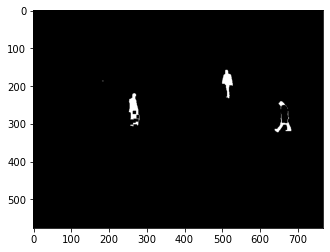

In [12]:

plt.imshow(closing, cmap='gray')
plt.show()

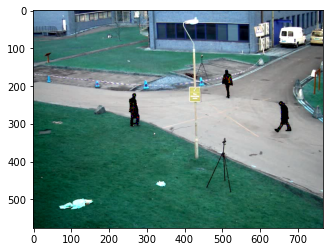

In [9]:
# Implementación de máscara
img_segmented = cv.bitwise_not(f, f, mask = closing).astype('uint8')
plt.imshow(img_segmented)
plt.show()